In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [63]:
# create random weights of n x d
def create_random_weights(n, d):
    return np.random.rand(n, d)

weights = create_random_weights(100, 10) # will be replaced by actual test weights
weights.shape

(100, 10)

In [65]:
# create training data
def create_training_data(n, d):
    X = np.random.rand(n, d)
    y = np.random.rand(n)
    return X, y

data = create_training_data(100, 10) # will be replaced by actual training
data[0].shape, data[1].shape

((100, 10), (100,))

In [54]:
# create a function to calculate the loss
def calculate_loss(weights, X, y):
    predictions = np.dot(X, weights.T)
    loss = np.mean((predictions - y.reshape(-1, 1)) ** 2)
    return loss


In [55]:
# test the calculate_loss function
loss = calculate_loss(weights, data[0], data[1])
print(f"Calculated Loss: {loss}")

Calculated Loss: 4.443103499618526


In [56]:
# create a function to plot the loss
def plot_loss(losses):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(len(losses)), y=losses)
    plt.title('Loss Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

In [57]:
# create a forward pass function
def forward_pass(X, weights):
    return np.dot(X, weights.T)

In [58]:
# create a backward pass function using newtons method
def backward_pass(X, y, weights):
    predictions = forward_pass(X, weights)
    errors = predictions - y.reshape(-1, 1)
    gradients = np.dot(errors.T, X) / len(y)
    return gradients


In [59]:
# create a function to update weights
def update_weights(weights, gradients, learning_rate=0.01):
    return weights - learning_rate * gradients

In [60]:
# create a function to train the model
def train_model(X, y, weights, iterations=100, learning_rate=0.01):
    losses = []
    for i in range(iterations):
        gradients = backward_pass(X, y, weights)
        weights = update_weights(weights, gradients, learning_rate)
        loss = calculate_loss(weights, X, y)
        losses.append(loss)
        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {loss}")
    return weights, losses

Iteration 0, Loss: 4.220856866270972
Iteration 10, Loss: 2.542646299049528
Iteration 20, Loss: 1.5565520952647007
Iteration 30, Loss: 0.9769520644449505
Iteration 40, Loss: 0.6360978773424679
Iteration 50, Loss: 0.43546945280228067
Iteration 60, Loss: 0.317205007000035
Iteration 70, Loss: 0.24732169687873476
Iteration 80, Loss: 0.2058609721716277
Iteration 90, Loss: 0.18110086317073615


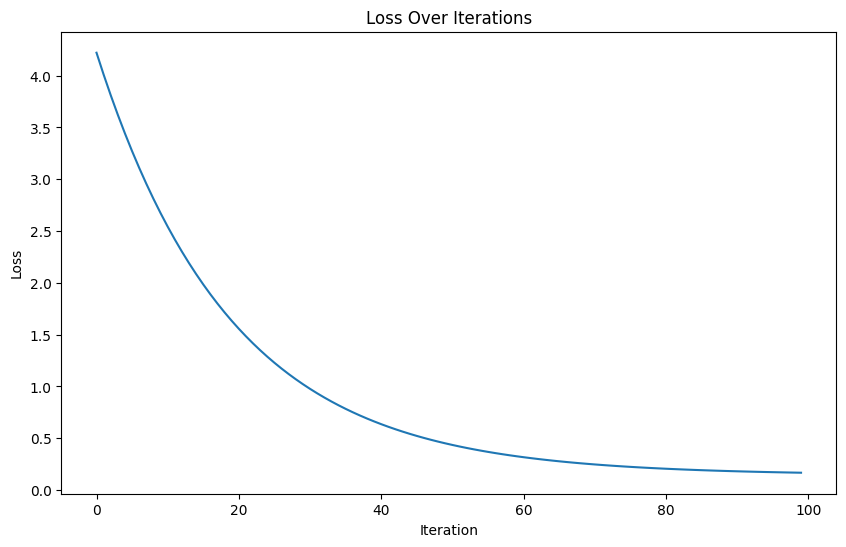

In [61]:
# train the model
trained_weights, losses = train_model(data[0], data[1], weights, iterations=100, learning_rate=0.01)
# plot the loss
plot_loss(losses)
# create a function to evaluate the model
def evaluate_model(X, y, weights):
    predictions = forward_pass(X, weights)
    loss = calculate_loss(weights, X, y)
    print(f"Evaluation Loss: {loss}")
    return predictions

In [62]:
# print the weights
print("Trained Weights:")
print(trained_weights)

Trained Weights:
[[-1.78516859e-02  2.43487145e-01  6.18337620e-01  6.57490903e-01
   2.55548879e-01  7.99608258e-03 -2.33011615e-01 -2.16835556e-01
  -8.08397606e-02  9.44375785e-02]
 [ 1.20661806e-01 -2.27837033e-01  5.36281020e-01 -1.26659731e-01
   8.16602589e-02  8.60857930e-02  3.67927353e-01  3.25073072e-01
   3.72113321e-01 -2.36575383e-01]
 [-3.59002080e-02  1.68505280e-01  4.63793144e-01  5.46301226e-01
   1.21694929e-01  1.50083023e-01 -2.66930721e-01 -2.24365573e-03
   1.00235810e-01  1.14255099e-01]
 [ 4.82939409e-01  4.40077955e-01  2.13763727e-01 -2.25537788e-01
  -2.91854411e-01  3.85071246e-01  2.16116214e-02  2.40601343e-01
   1.53894559e-01 -5.24228352e-02]
 [ 2.73737161e-01  2.39535844e-01 -3.35660177e-02 -2.65714740e-04
   3.33963203e-01  4.75107098e-01  2.28548923e-01 -2.40115427e-01
  -8.87748593e-02  1.63852761e-01]
 [ 2.02310691e-01  5.48044021e-01  2.25759050e-01 -1.50472790e-01
   1.65908754e-01  4.38556507e-01  2.05806794e-01 -1.87164189e-01
  -2.74269350e-0